# 3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

## Team Geeks

Ramandeep Kaur   -C0894968

Neema            -C0894454

Rehan Khokhar    -C0896278

Nagasai Velpuri  -C0896277

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


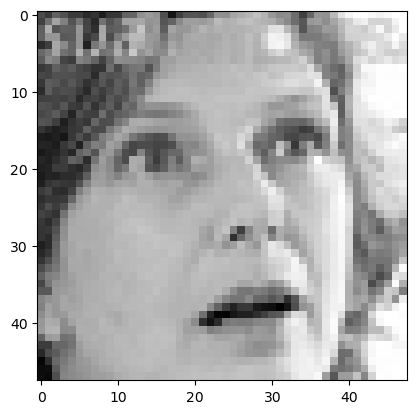

facial emotion: surprise


In [9]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex =np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

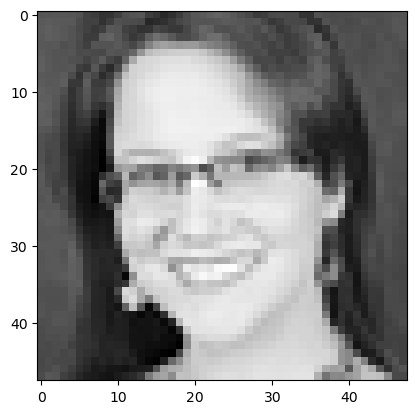

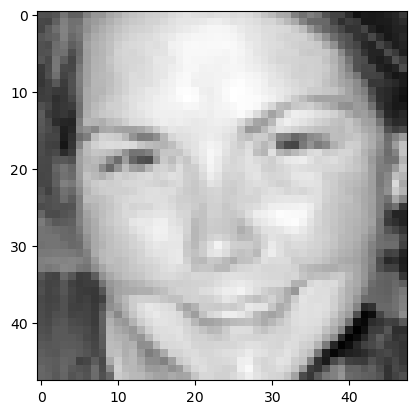

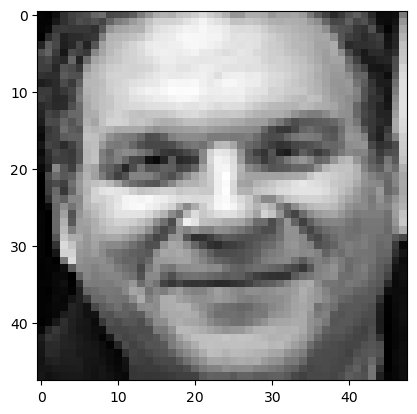

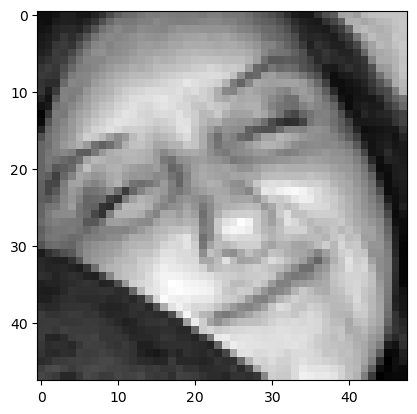

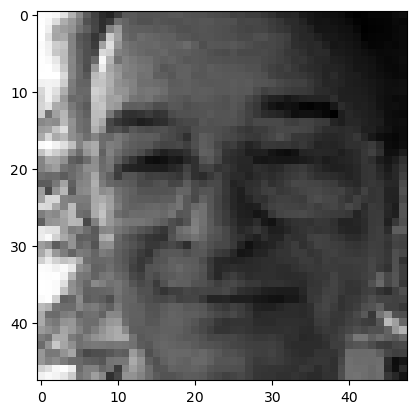

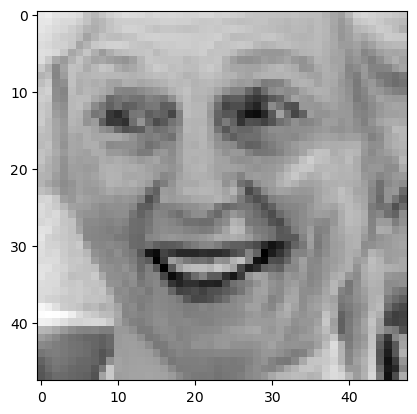

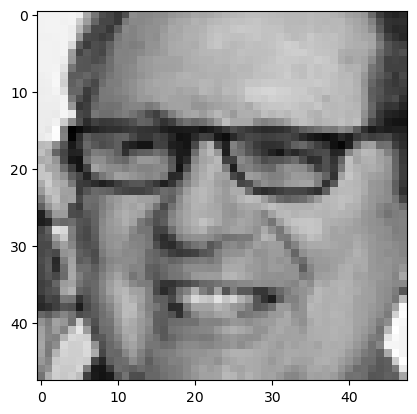

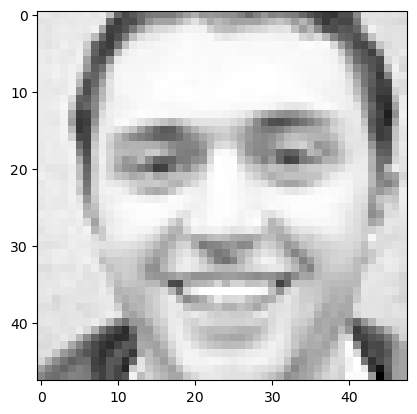

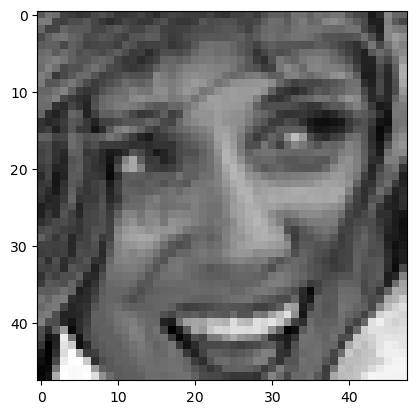

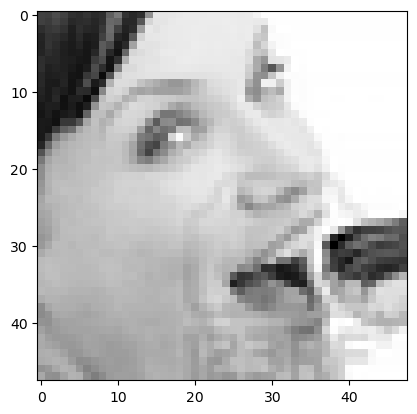

In [10]:
happy_rows = np.where(y_training[:, 3] == 1)[0]
for i in range(10):
    sample = x_training[happy_rows[i].astype(int), :]
    sample = sample.reshape(48, 48)
    plt.imshow(sample, cmap='gray')
    plt.show()

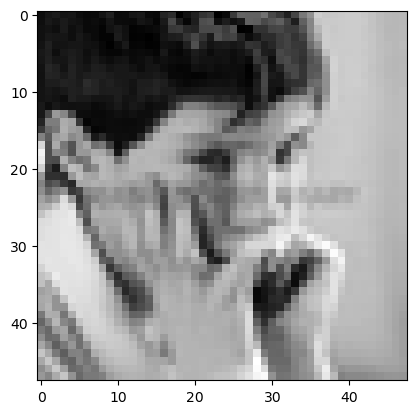

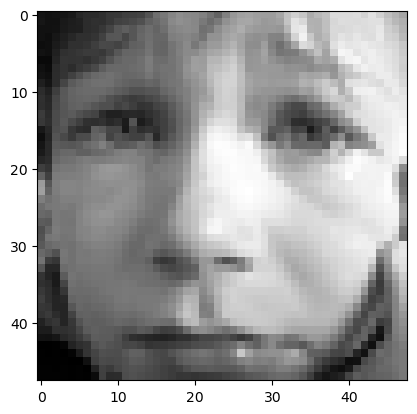

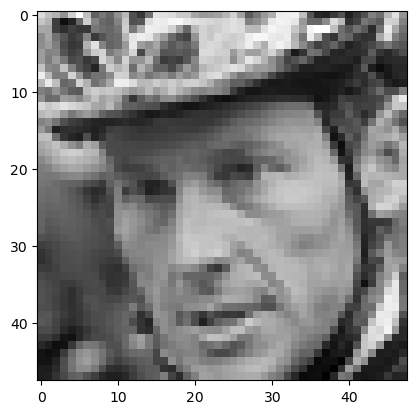

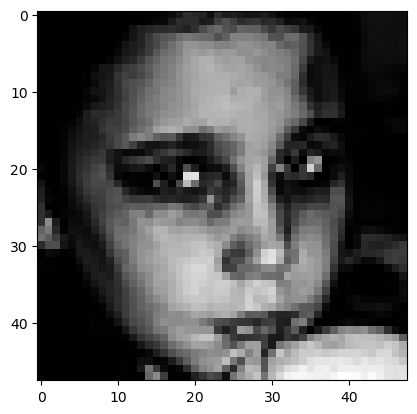

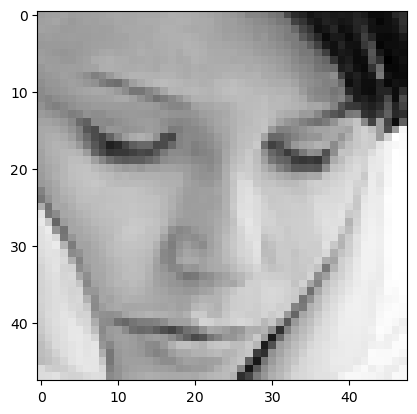

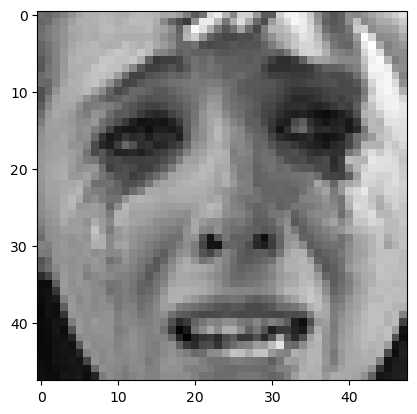

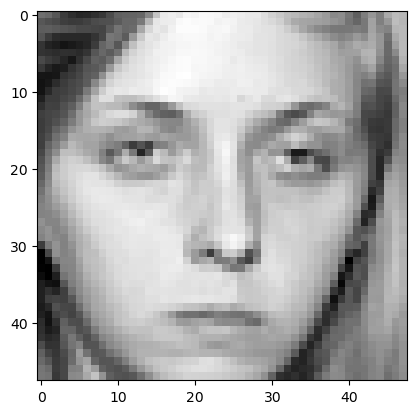

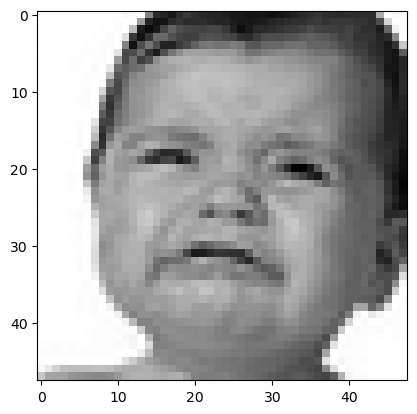

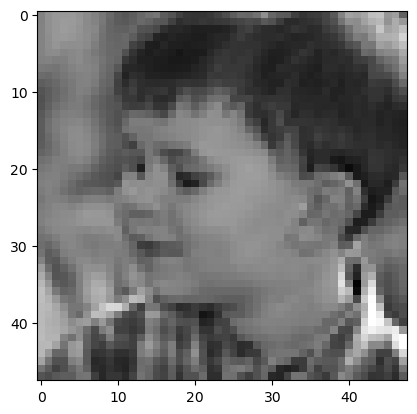

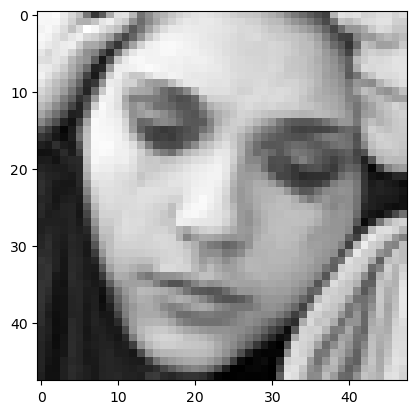

In [11]:
sad_rows = np.where(y_training[:, 4] == 1)[0]
for i in range(10):
    sample = x_training[sad_rows[i].astype(int), :]
    sample = sample.reshape(48, 48)
    plt.imshow(sample, cmap='gray')
    plt.show()

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

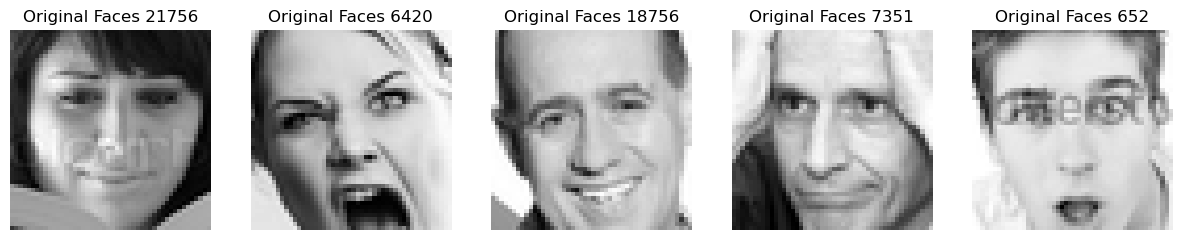

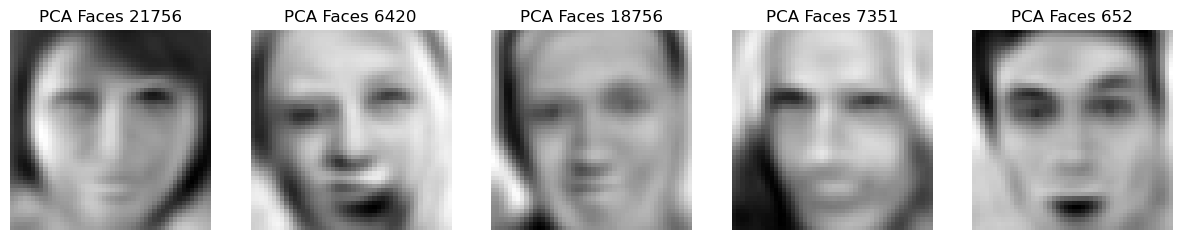

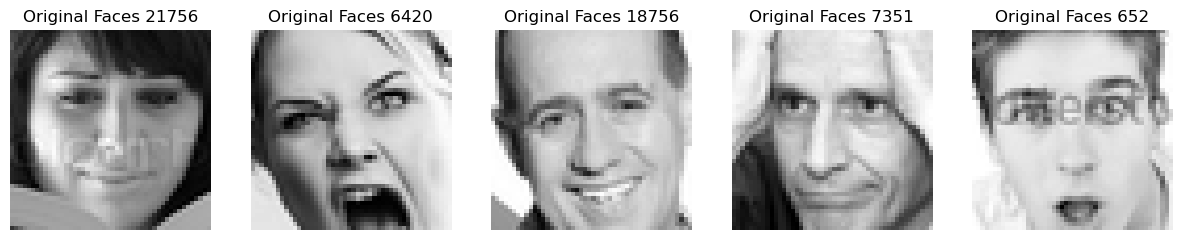

AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'inverse_transform'

In [14]:
images = x_training.reshape((-1, 48, 48))

sample_indices = np.random.choice(images.shape[0], size=5, replace=False)

def plot_faces(images, indices, title):
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(images[index], cmap='gray')
        plt.title(f'{title} {index}')
        plt.axis('off')
    plt.show()

#PCA Using 100 Components and LDA with 2 Components

pca = PCA(n_components=100)
X_pca = pca.fit_transform(x_training.reshape(-1,2304))

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(x_training.reshape(-1,2304), np.argmax(y_training, axis=1))

plot_faces(images, sample_indices, 'Original Faces')
plot_faces(pca.inverse_transform(X_pca).reshape((-1, 48, 48)), sample_indices, 'PCA Faces')

plot_faces(images, sample_indices, 'Original Faces')
plot_faces(lda.inverse_transform(X_lda).reshape((-1, 48, 48)), sample_indices, 'LDA Faces')

In [10]:

# Load data (example with faces from LFW dataset)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.x_training.reshape(-1,2304)
y = lfw_people.np.argmax(y_training, axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot LDA-transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(scatter, label='Person')
plt.title('LDA Projection of Faces')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

AttributeError: x_training

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [15]:
X_train = x_training.reshape(-1, 2304)[happy_rows]
Y_train = [0] * happy_rows.size
X_train = np.append(X_train,x_training.reshape(-1, 2304)[sad_rows],axis=0)
Y_train = Y_train+[1] * sad_rows.size
print(happy_rows.size,sad_rows.size,X_train.shape,len(Y_train))

7215 4830 (12045, 2304) 12045


In [16]:
happy_rows_test = np.where(y_testing[:, 3] == 1)[0]
sad_rows_test = np.where(y_testing[:, 4] == 1)[0]
X_test = x_testing.reshape(-1,2304)[happy_rows_test]
Y_test = [0] * happy_rows_test.size
X_test = np.append(X_test,x_testing.reshape(-1,2304)[sad_rows_test],axis=0)
Y_test = Y_test+[1] * sad_rows_test.size

In [21]:
nb_classifier = BernoulliNB()

nb_classifier.fit(X_train, Y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [22]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression()

logreg_classifier.fit(X_train, Y_train)

y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


C:\Users\velpu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_classifier.fit(X_train, Y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


param_grid = {'C': [0.1, 10, 100], 'gamma': ['scale']}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy with best model: {accuracy:.2f}')

Accuracy: 0.74
Best parameters found:
{'C': 10, 'gamma': 'scale'}
Best cross-validation score:
0.7519302615193026
Accuracy with best model: 0.75


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

Using the above methods we can calculate accuracy of prediction, where as to measure degree we need to do multi class intensity prediction. If we consider Accuracy Support vector Machine is giving more accuracy(75%) with the parameters of C: 10.

YOUR ANSWER HERE

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

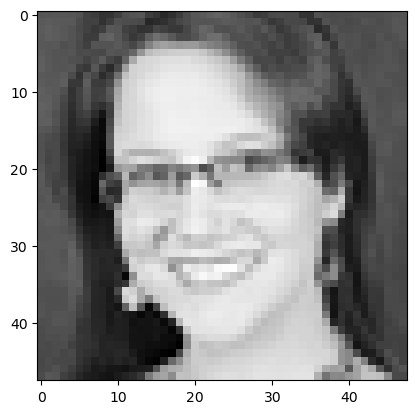

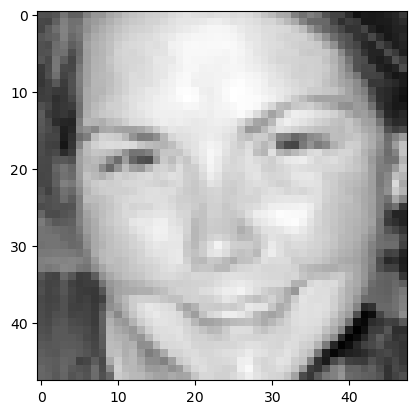

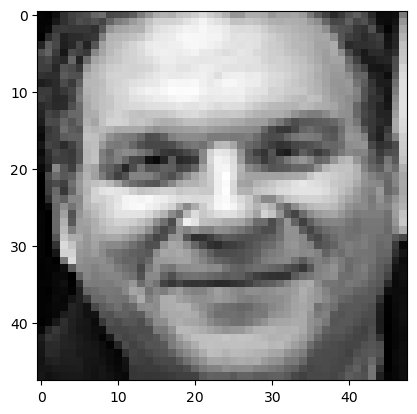

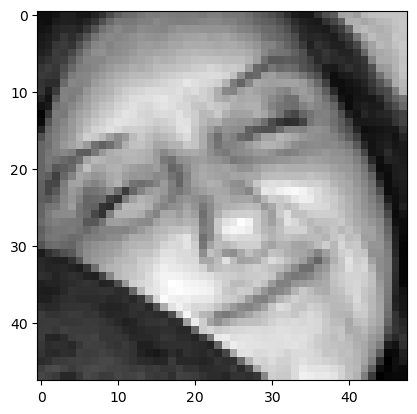

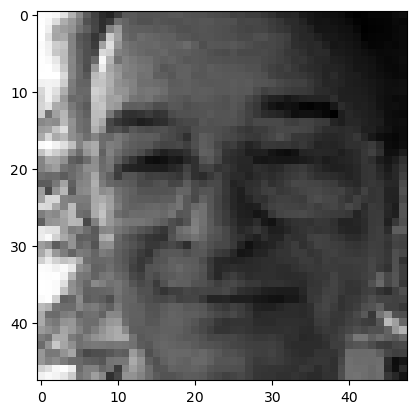

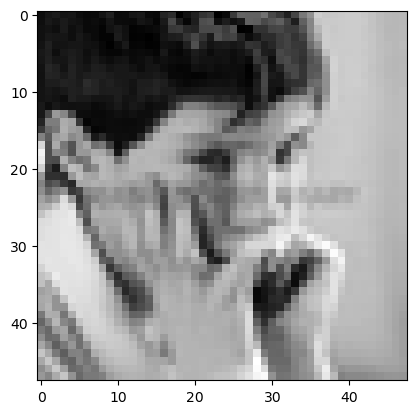

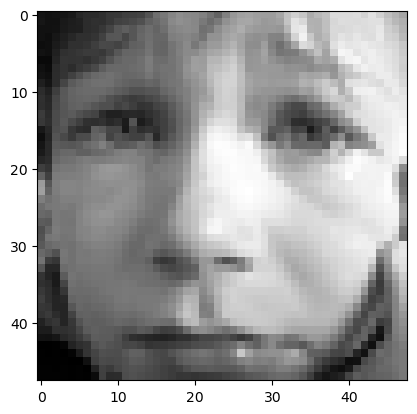

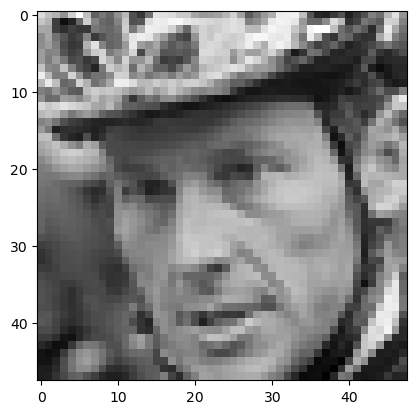

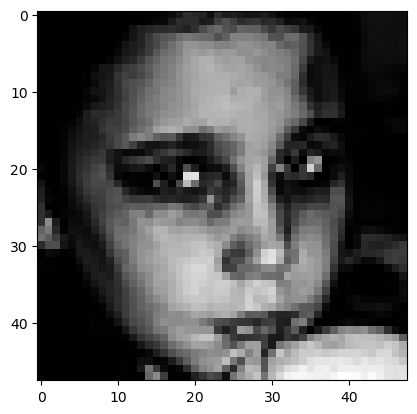

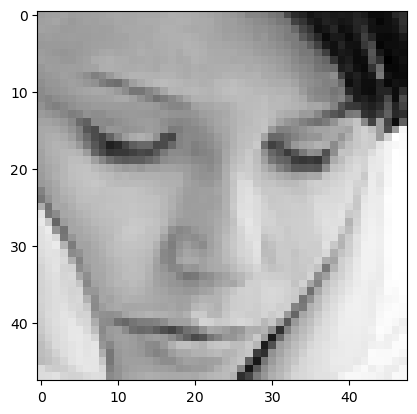

In [12]:
for i in range(5):
    sample = x_training[happy_rows[i].astype(int), :]
    sample = sample.reshape(48, 48)
    plt.imshow(sample, cmap='gray')
    plt.show()
for i in range(5):
    sample = x_training[sad_rows[i].astype(int), :]
    sample = sample.reshape(48, 48)
    plt.imshow(sample, cmap='gray')
    plt.show()

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

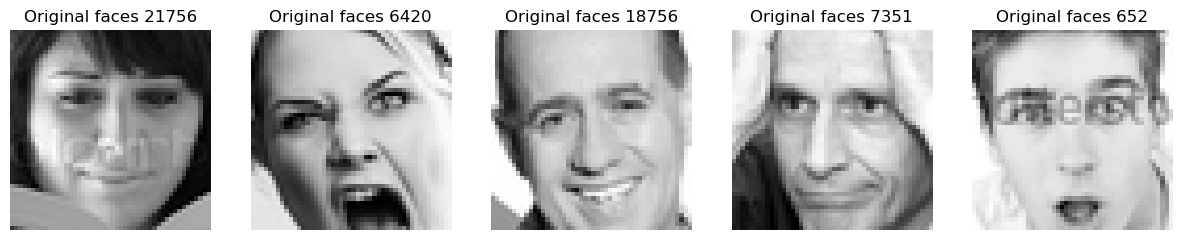

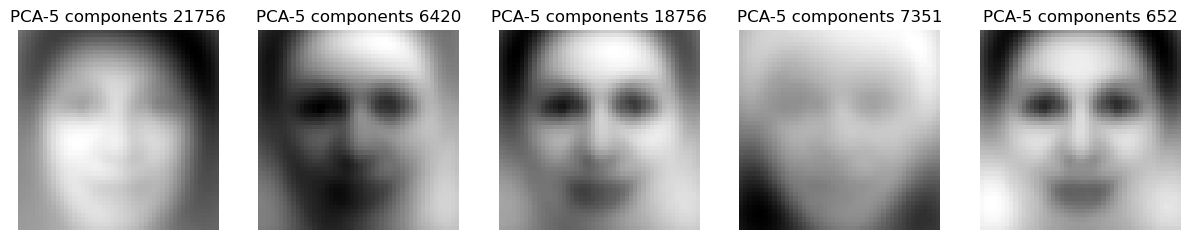

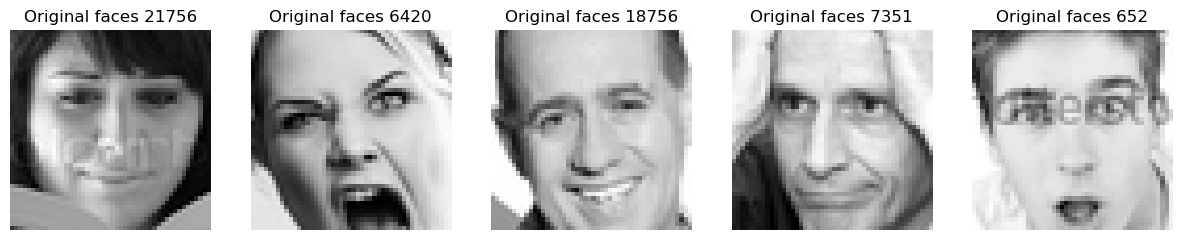

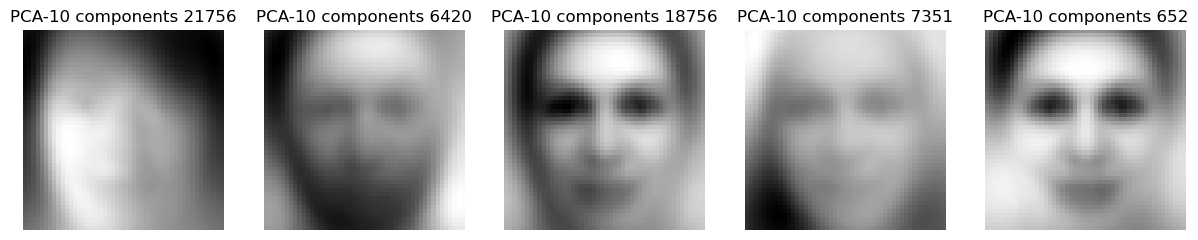

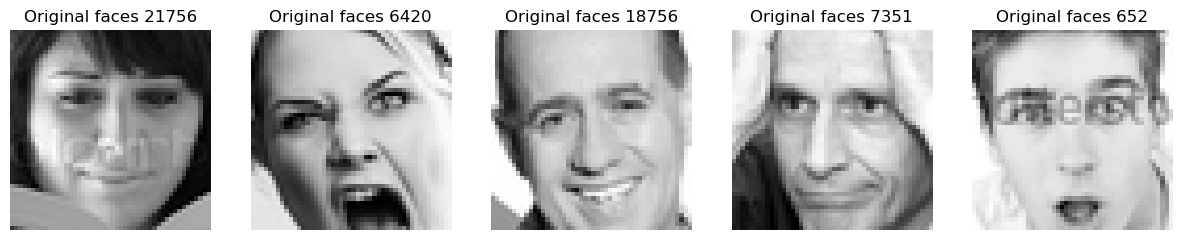

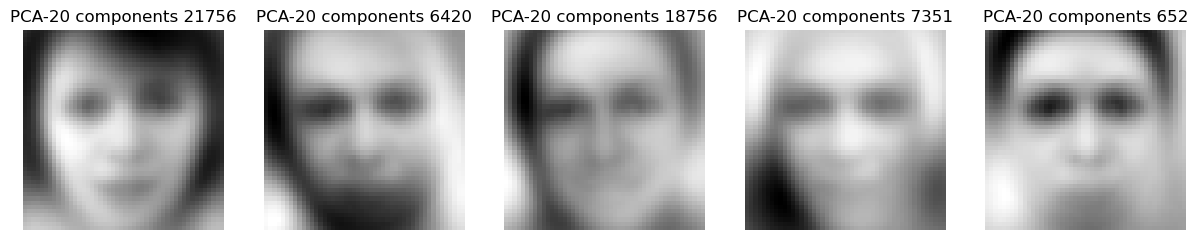

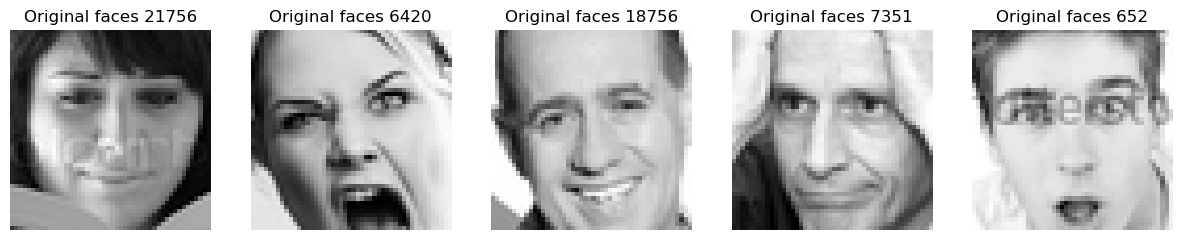

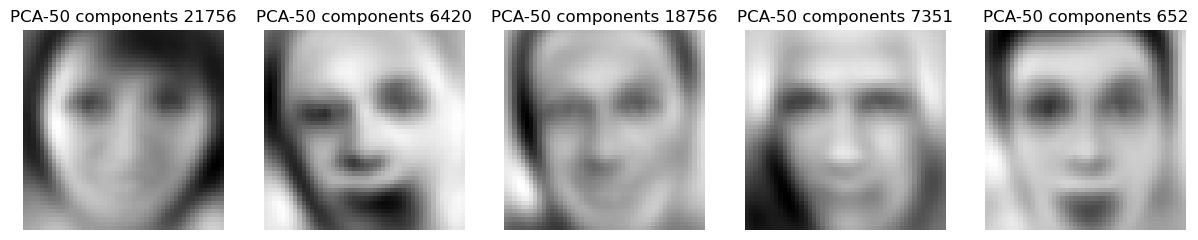

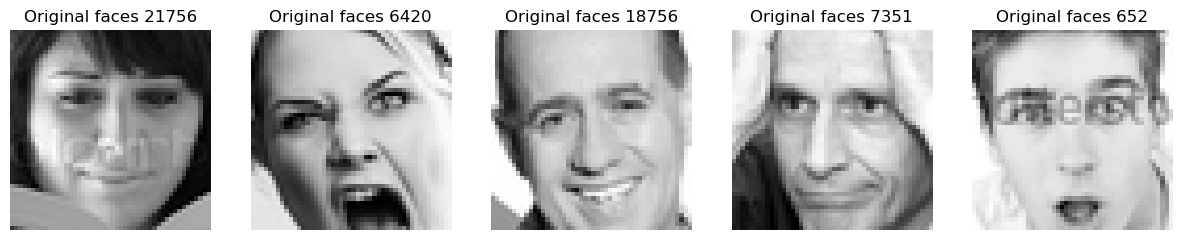

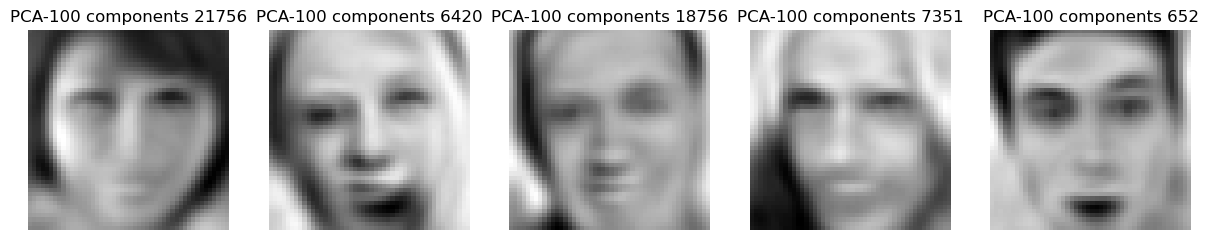

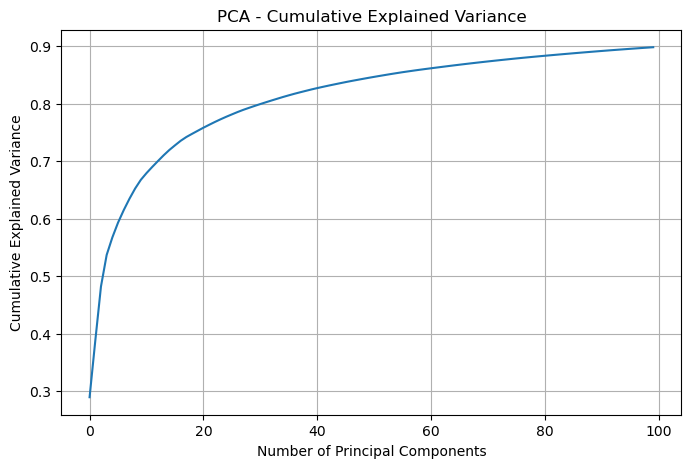

In [17]:
num_components = [5, 10, 20, 50, 100]

for n in num_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(x_training.reshape(-1,2304))
    plot_faces(images, sample_indices, f'Original faces')
    plot_faces(pca.inverse_transform(X_pca).reshape((-1, 48, 48)), sample_indices, f'PCA-{n} components')

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [8]:
X_train = x_training.reshape(-1, 2304)
X_test = x_testing.reshape(-1, 2304)
y_training = trainingset[:, n_inputs:n_inputs + n_classes]
y_testing = testingset[:, n_inputs:n_inputs + n_classes]
y_train=np.argmax(y_training, axis=1)
y_test=np.argmax(y_testing, axis=1)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.23


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

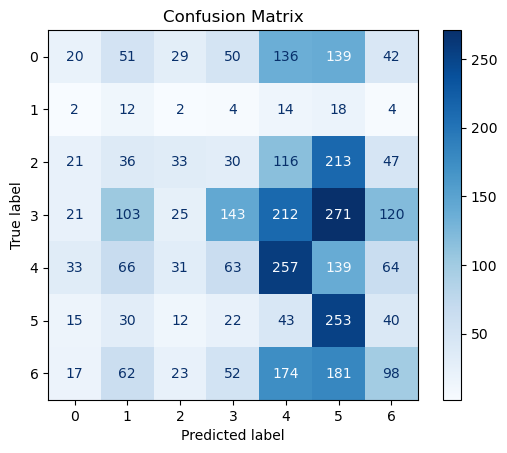

In [77]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [9]:
logreg_classifier = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logreg_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.33


C:\Users\velpu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

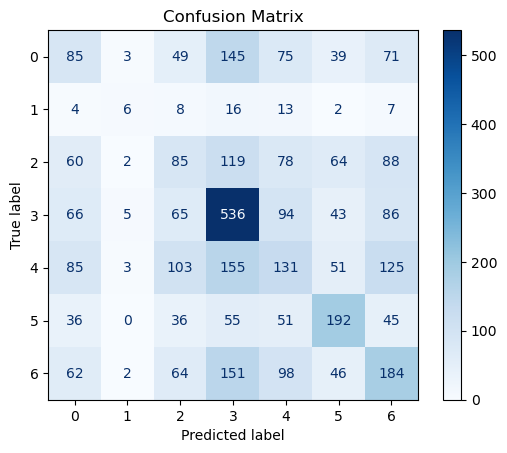

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [ ]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

SVM Taking more time to execute.

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

As per Naive Bayes Confusion matrix Suprise and Neutral looks same

As per Logistic Fear is more resembling Happy

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [55]:
pred_label = logreg_classifier.predict(X_test)
pred_prob = logreg_classifier.predict_proba(X_test)[:, 1]
wrong_predictions = X_test[y_test != pred_label,:]
pp=pred_prob[y_test != pred_label]
pp=pp*100
pp_int= [int(x) for x in pp]
pp_int=np.array(pp_int)

In [58]:
pp_reshaped = pp_int.reshape(-1, 1)
merged_array = np.concatenate((wrong_predictions, pp_reshaped), axis=1)
merged_array

array([[ 71.,  47.,  49., ..., 208., 212.,  73.],
       [255., 255., 255., ..., 196., 185.,  72.],
       [  0.,   0.,   0., ...,   1.,   1.,  56.],
       ...,
       [  9.,   9.,   9., ...,  39.,  17.,   0.],
       [ 43.,  50.,  65., ..., 219., 220.,   0.],
       [254., 254., 254., ..., 129., 180.,   0.]])

In [70]:
sorted_data = merged_array[merged_array[:, -1].argsort()[::-1]]
sorted_data=sorted_data[:,0:2304]
sorted_data=sorted_data[:10]
sorted_data.shape

(10, 2304)

In [80]:
array1_subset = X_test[:, :2304]
comparison = np.all(array1_subset[:, np.newaxis, :] == wrong_predictions, axis=-1)
indices = np.where(comparison.all(axis=1))[0]
result = X_test[indices]
result.shape

(0, 2304)

In [75]:
for sampleindex in range(1,10):
    sample = result[sampleindex, :]
    sample = sample.reshape(48, 48)
    plt.imshow(sample, cmap='gray')
    plt.show()
    print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

IndexError: index 1 is out of bounds for axis 0 with size 0

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [69]:
tt=testingset[trainingset[:, 0:n_inputs]==sorted_data]

C:\Users\velpu\AppData\Local\Temp\ipykernel_3168\1082122558.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  tt=trainingset[trainingset[:, 0:n_inputs]==sorted_data]
